# Initial exploration of the SOPHIE results

SOPHIE finds genes that are differentially expressed and specific to a given contrast. We applied sophie to a varient of *Pseudomonas aeruginosa* (Pa) RNA seq samples. 

Experiment codes:
+ spu: ex vivo sputum samples inoculated with Pa
+ spu_m: ex vivo sputum samples inoculated with Pa and treated with metals
+ asm: artificial sputum medium inoculated with Pa
+ asm_m: artificial sputum medium inoculated with Pa and treated with metals
+ M63: minimal medium inoculated with Pa.

Actual analysis for biological interpretation will come later, but this notebook starts exploring what the results look like.

In [22]:
library(readr)
library(dplyr)
library(purrr)
library(tidyr)
library(janitor)
library(ggplot2)

In [4]:
setwd("..")

In [5]:
# adjust plot size rendered inline
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)

## read in and parse sophie results

In [7]:
sophie_results <- Sys.glob("outputs/sophie/*/generic_gene_summary.tsv") %>%
  set_names() %>%
  map_dfr(read_tsv, show_col_types = F, .id = "contrast") %>%
  mutate(contrast = gsub("\\/generic_gene_summary.tsv", "", contrast),
         contrast = basename(contrast)) %>%
  clean_names() %>%
  select(-x1) %>%
  separate(contrast, into = c("strain", "contrast"), sep = "__")

New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [8]:
# label results based on significance
sophie_results <- sophie_results %>%
  mutate(sig   = ifelse(adj_p_value_real < 0.05 & abs_log2fold_change_real > 1, "sig", "nonsig"),
         sig = ifelse(sig == "sig" & z_score > 4, "sig_&_zscore", sig))

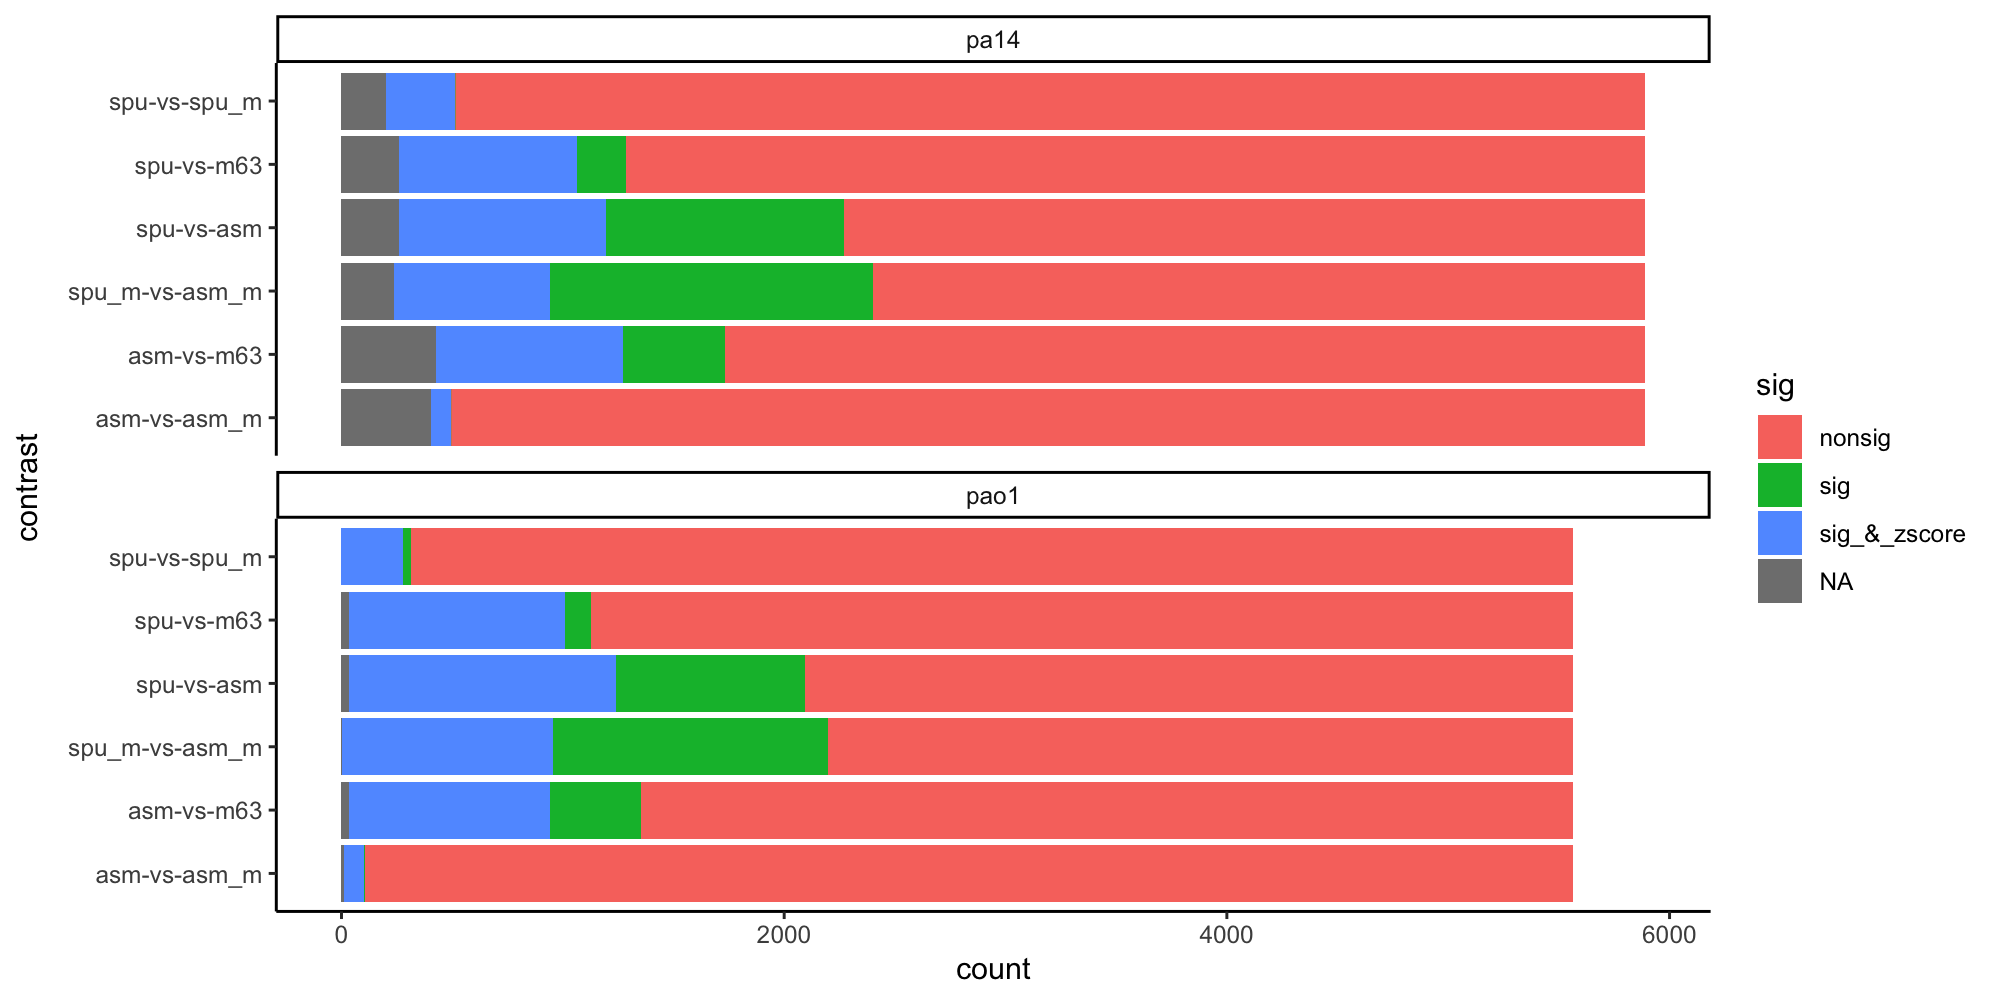

In [9]:
# plot the number of genes that were significantly differentially expressed, 
# and those that were both sig dif ex and had a "high" z score
ggplot(sophie_results, aes(x = contrast, fill = sig)) +
  geom_bar() +
  facet_wrap(~strain, nrow = 2) +
  theme_classic() + 
  coord_flip()

In [11]:
# filter to only significant genes
sophie_sig <- sophie_results %>%
  filter(adj_p_value_real < 0.05) %>%
  filter(abs_log2fold_change_real > 1) %>%
  filter(abs(z_score) > 4)

In [12]:
# separate results out by strain
sophie_sig_pa14 <- sophie_sig %>%
  filter(strain == "pa14")

sophie_sig_pao1 <- sophie_sig %>%
  filter(strain == "pao1")

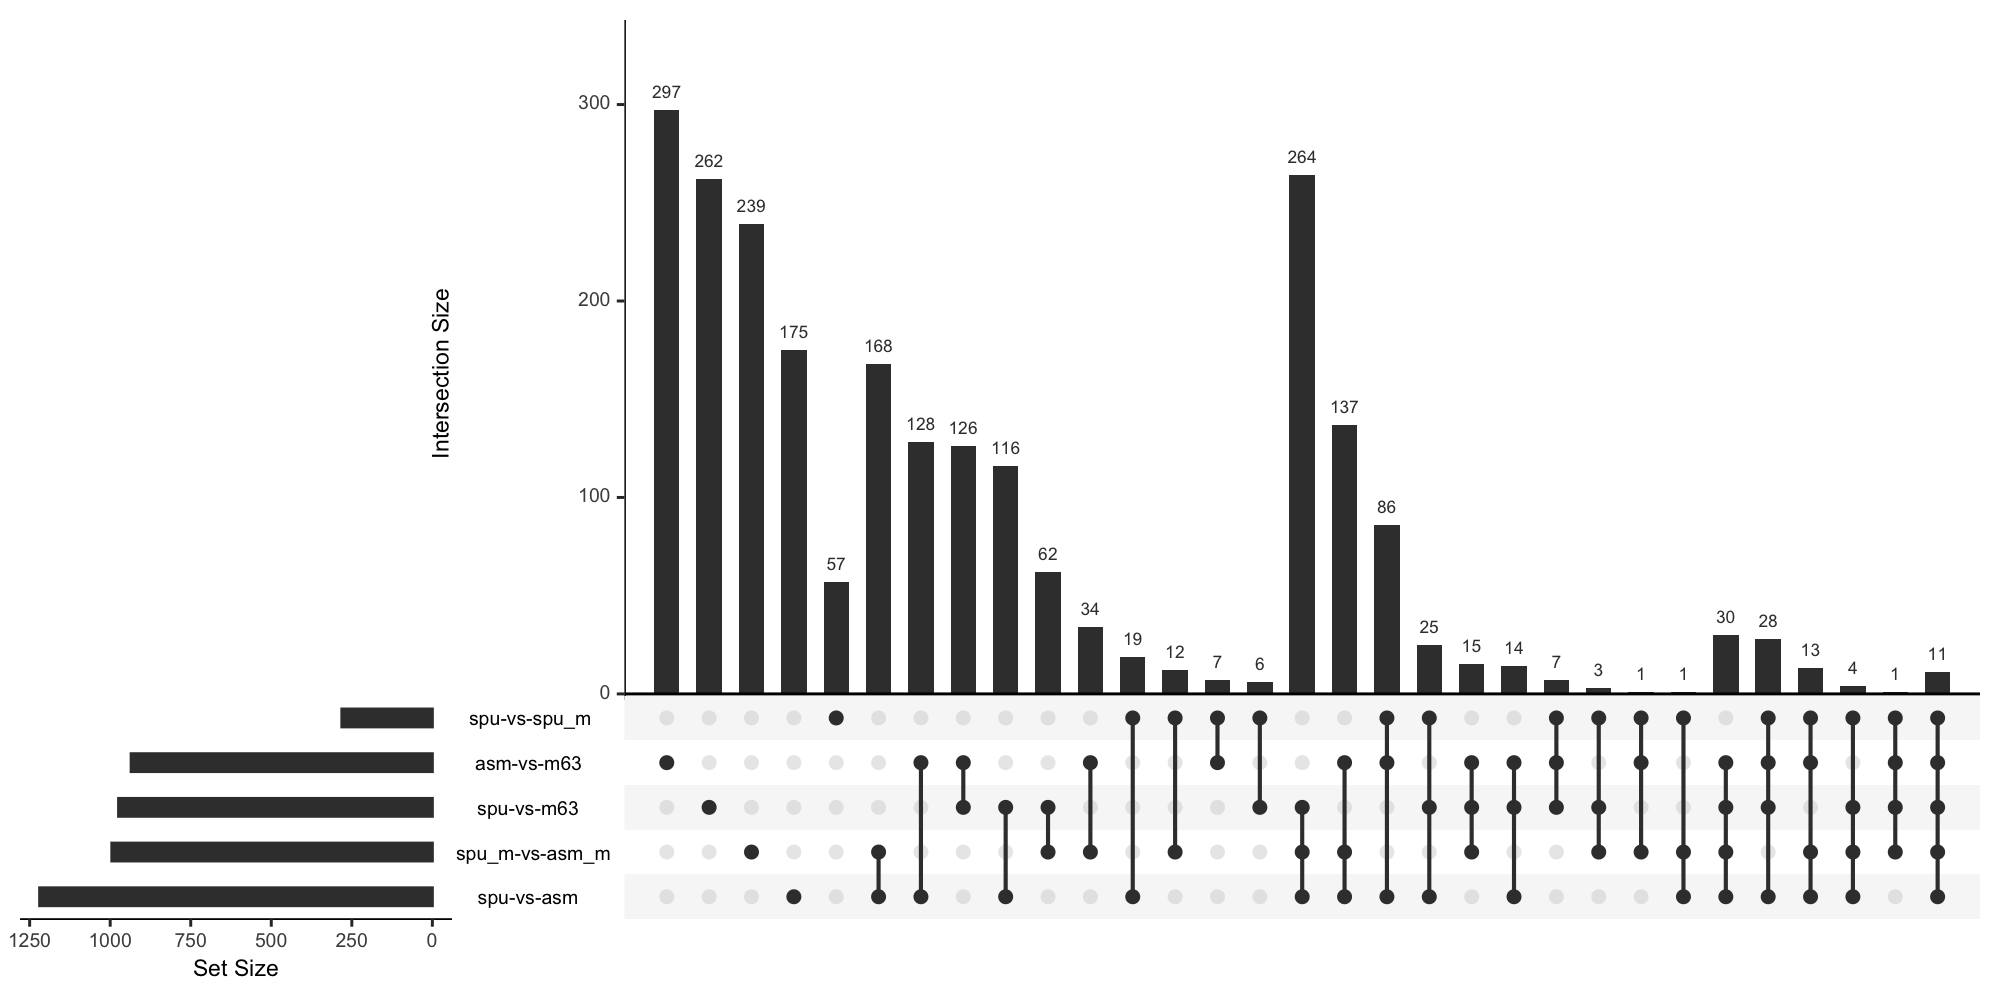

In [14]:
upset_list1 <- UpSetR::fromList(list('asm-vs-asm_m'   = filter(sophie_sig_pao1, contrast == 'asm-vs-asm_m')$gene_id,
                                     'asm-vs-m63'     = filter(sophie_sig_pao1, contrast == 'asm-vs-m63')$gene_id,
                                     'spu_m-vs-asm_m' = filter(sophie_sig_pao1, contrast == 'spu_m-vs-asm_m')$gene_id,
                                     'spu-vs-asm'     = filter(sophie_sig_pao1, contrast == 'spu-vs-asm')$gene_id,
                                     'spu-vs-m63'     = filter(sophie_sig_pao1, contrast == 'spu-vs-m63')$gene_id,
                                     'spu-vs-spu_m'   = filter(sophie_sig_pao1, contrast == 'spu-vs-spu_m')$gene_id))
UpSetR::upset(upset_list1)

## Notes to analyze annotations/function in the future

In [ ]:
# link to download pao1 annotations
# pao1_annotations <- read_csv("https://www.pseudomonas.com/downloads/pseudomonas/pgd_r_20_2/Pseudomonas_aeruginosa_PAO1_107/Pseudomonas_aeruginosa_PAO1_107.csv.gz")

In [ ]:
# KEGG enrichment analysis
# tmp <- clusterProfiler::enrichKEGG(gene = unique(sophie_sig_pao1$gene_id), organism = "pae")
# clusterProfiler::dotplot(tmp)